#### Problem Statement:
##### Client FinMan is a financial services company that provides various financial services like loan, investment funds, insurance etc. to its customers. FinMan wishes to cross-sell health insurance to the existing customers who may or may not hold insurance policies with the company. The company recommend health insurance to it's customers based on their profile once these customers land on the website.The company needs your help in building a model to predict whether the person will be interested in their proposed Health plan/policy.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### Loading Data

In [2]:
train = pd.read_csv("train_Df64byy.csv")
test  = pd.read_csv("test_YCcRUnU.csv")

###### Copying original Data 

In [3]:
train_original=train.copy()
test_original=test.copy()

#### Understanding Data

In [4]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [5]:
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [6]:
#Reading the column name of train data
train.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [7]:
#Reading the column name of test data 
test.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium'],
      dtype='object')

In [8]:
# Datatype of each column
train.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [9]:
# number of rows and column in train and test data 
train.shape,test.shape

((50882, 14), (21805, 13))

After reading about data we found following points in our data-

1.Train has 50882 rows and 14 columns 
  Test has 21805 rows and 13 columns

2.Datatype in our data is of three types-
  integer - ID,Region_Code,Upper_Age,Lower_Age,Reco_Policy_Cat,Response 
  float   - Holding_Policy_Type,Reco_Policy_Premium
  object  - City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration

3.Target variable is the column name "Response"

In [10]:
#Frequency table of target variable
train['Response'].value_counts()

0    38673
1    12209
Name: Response, dtype: int64

In [11]:
#Percentage Distribution of target variable
train['Response'].value_counts(normalize=True)

0    0.760053
1    0.239947
Name: Response, dtype: float64

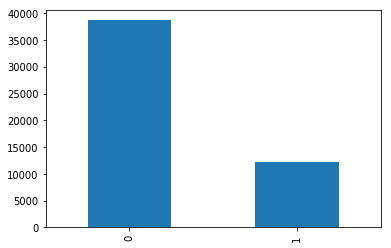

In [12]:
#Bar plot of target variable
train['Response'].value_counts().plot.bar()

After analysing the target variable we get that 76% people said no to policy and 23% opted for it.

#### Missing values

In [15]:
#Missing values in train dataset
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [16]:
#Missing values in test dataset
test.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [17]:
# Calculating the column which has more than 30% missing values in train dataset
na_col=train.isnull().sum()
na_col=na_col[na_col.values>(0.3*len(train))]
na_col

Holding_Policy_Duration    20251
Holding_Policy_Type        20251
dtype: int64

In [18]:
# Calculating the column which has more than 30% missing values in test dataset
na_col=test.isnull().sum()
na_col=na_col[na_col.values>(0.3*len(test))]
na_col

Holding_Policy_Duration    8603
Holding_Policy_Type        8603
dtype: int64

In [19]:
#filling missing values in Health Indicator column of train and test dataset
train['Health Indicator'].fillna(train['Health Indicator'].mode()[0],inplace=True)
test['Health Indicator'].fillna(test['Health Indicator'].mode()[0],inplace=True)

In [20]:
#Dropping the 'Holding_Policy_Duration' and 'Holding_Policy_Type' column from train nad test dataset
train=train.drop(['Holding_Policy_Duration','Holding_Policy_Type'],axis=1)
test=test.drop(['Holding_Policy_Duration','Holding_Policy_Type'],axis=1)

In [21]:
train.shape,test.shape

((50882, 12), (21805, 11))

#### Visualization

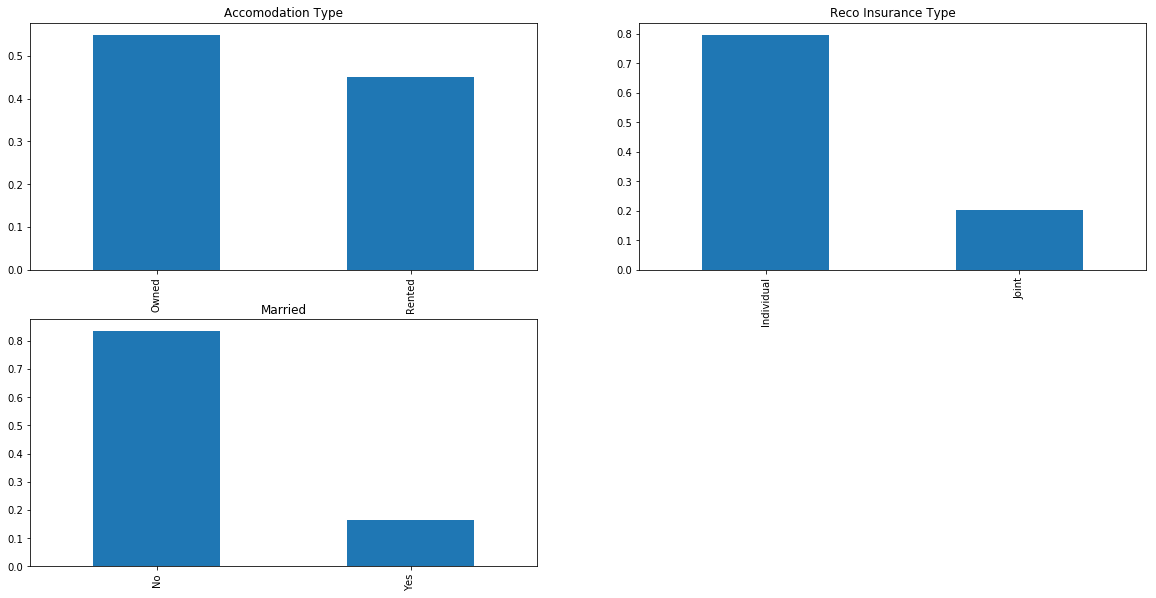

In [14]:
# Visualizing the categorical data
plt.figure(1)
plt.subplot(221)
train['Accomodation_Type'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Accomodation Type')
plt.subplot(222)
train['Reco_Insurance_Type'].value_counts(normalize=True).plot.bar(title='Reco Insurance Type')
plt.subplot(223)
train['Is_Spouse'].value_counts(normalize=True).plot.bar(title='Married')

From the above bar plots we inferred that:

1.More than 50% of customer have their own propery and nearly 40% have rented ones.

2.Nearly 80% of customer have individual policy and 20% have joint

3.80% of customer are not married who owns the policy.

#### Checking Outliers

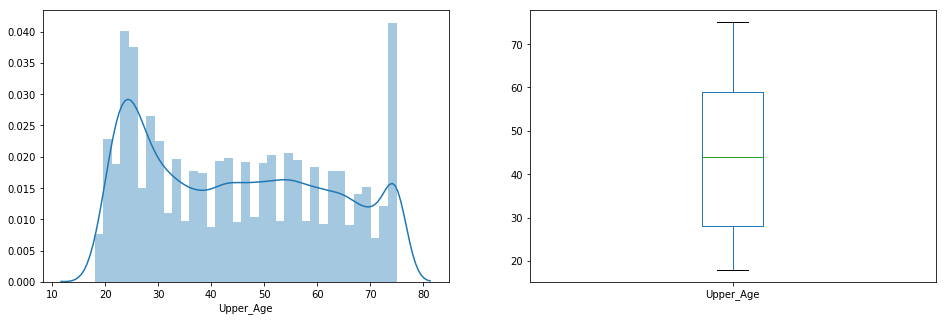

In [22]:
#Checking for outliers in upper age column
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Upper_Age']);
plt.subplot(122)
train['Upper_Age'].plot.box(figsize=(16,5))
plt.show()

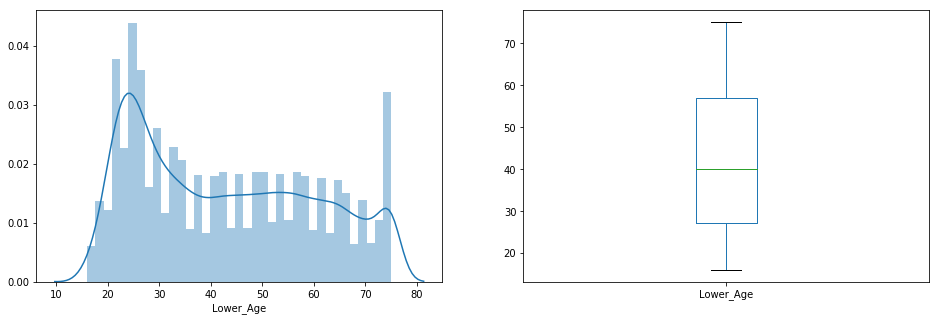

In [23]:
#Checking for outliers in lower age column
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Lower_Age']);
plt.subplot(122)
train['Lower_Age'].plot.box(figsize=(16,5))
plt.show()

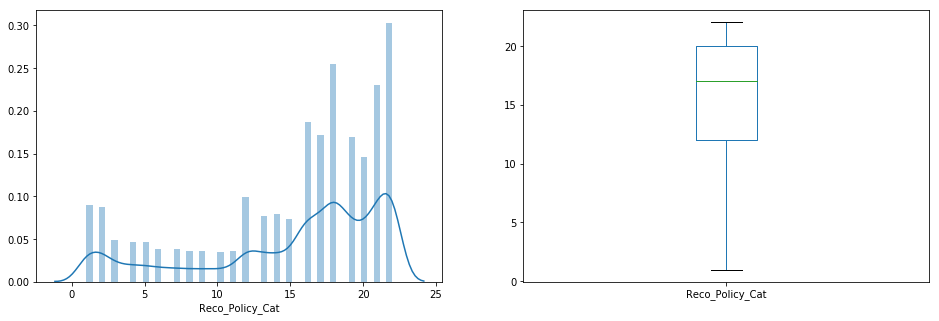

In [24]:
#Checking for outliers in Reco Policy Cat column
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Reco_Policy_Cat']);
plt.subplot(122)
train['Reco_Policy_Cat'].plot.box(figsize=(16,5))
plt.show()

In the above three columns we do not get any outliers so our data is free of outliers

#### Visulization of variables vs target variable

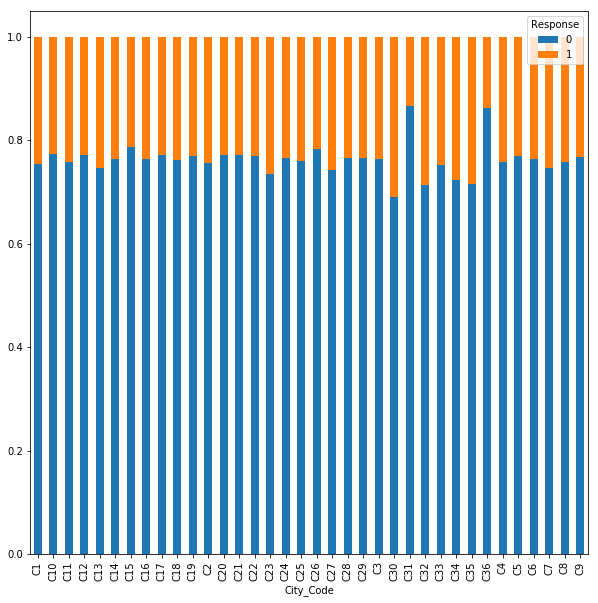

In [25]:
#City code vs Response
City_Code=pd.crosstab(train['City_Code'],train['Response'])
City_Code.div(City_Code.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(10,10))

From above bar plot we conclude that city with code C13 has highest number of people opting for policy while C31 city has lowest people opting for policy

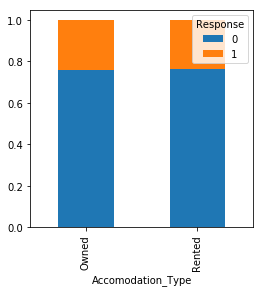

In [26]:
#Accomodation type vs Response
Accomodation_Type=pd.crosstab(train['Accomodation_Type'],train['Response'])
Accomodation_Type.div(Accomodation_Type.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

Owned and rented both the accomodation type people have equal response for policy

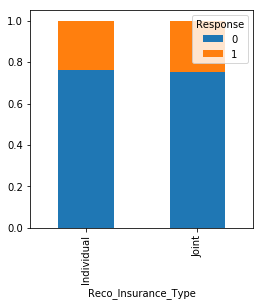

In [27]:
# Reco insurance type vs response
Reco_Insurance_Type=pd.crosstab(train['Reco_Insurance_Type'],train['Response'])
Reco_Insurance_Type.div(Reco_Insurance_Type.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

Individual and joint type have nearly same response for policy

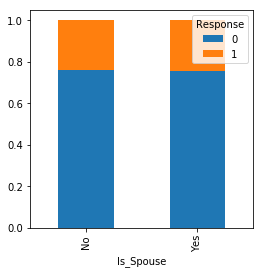

In [28]:
#Is_spouse vs response
Is_Spouse=pd.crosstab(train['Is_Spouse'],train['Response'])
Is_Spouse.div(Is_Spouse.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

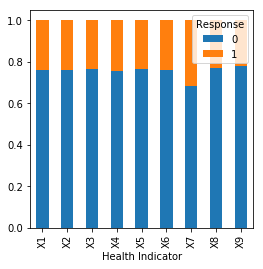

In [29]:
#Health Indicator vs Response
Health_Indicator=pd.crosstab(train['Health Indicator'],train['Response'])
Health_Indicator.div(Health_Indicator.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

Person with health indicator X7 has opted for policy more than others.

Text(0, 0.5, 'Percentage')

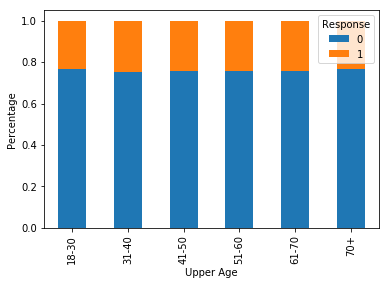

In [30]:
#Upper Age vs Response
bins=[18,30,40,50,60,70,80]
group=['18-30','31-40','41-50','51-60','61-70','70+']
train['Upper_Age_bin']=pd.cut(train['Upper_Age'],bins,labels=group)
Upper_Age_bin=pd.crosstab(train['Upper_Age_bin'],train['Response'])
Upper_Age_bin.div(Upper_Age_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Upper Age')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

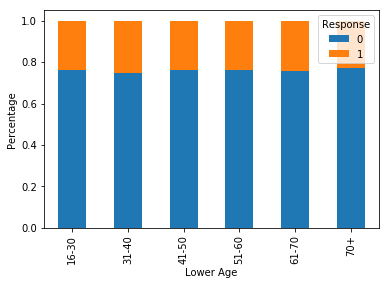

In [31]:
#Lower Age vs Response
bins=[16,30,40,50,60,70,80]
groups=['16-30','31-40','41-50','51-60','61-70','70+']
train['Lower_Age_bin']=pd.cut(train['Lower_Age'],bins,labels=groups)
Lower_Age_bin=pd.crosstab(train['Lower_Age_bin'],train['Response'])
Lower_Age_bin.div(Lower_Age_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Lower Age')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

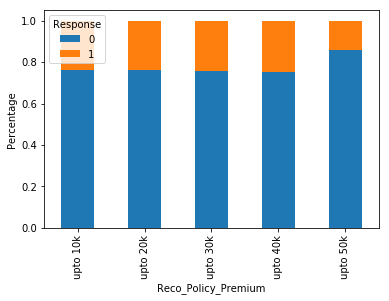

In [32]:
#Reco Policy premium vs response
bins=[1000,10000,20000,30000,40000,50000]
groups=['upto 10k','upto 20k','upto 30k','upto 40k','upto 50k']
train['Reco_Policy_Premium_bin']=pd.cut(train['Reco_Policy_Premium'],bins,labels=groups)
Reco_Policy_Premium_bin=pd.crosstab(train['Reco_Policy_Premium_bin'],train['Response'])
Reco_Policy_Premium_bin.div(Reco_Policy_Premium_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Reco_Policy_Premium')
plt.ylabel('Percentage')

Policy with high premium has less positive reponse

Text(0, 0.5, 'Percentage')

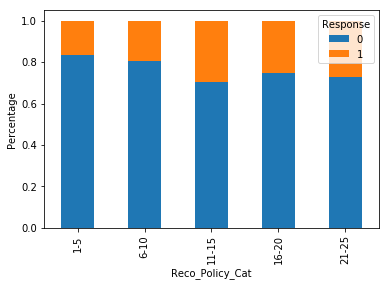

In [33]:
#Reco Policy cat vs response
bins=[1,5,10,15,20,25]
groups=['1-5','6-10','11-15','16-20','21-25']
train['Reco_Policy_Cat_bin']=pd.cut(train['Reco_Policy_Cat'],bins,labels=groups)
Reco_Policy_Cat_bin=pd.crosstab(train['Reco_Policy_Cat_bin'],train['Response'])
Reco_Policy_Cat_bin.div(Reco_Policy_Cat_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Reco_Policy_Cat')
plt.ylabel('Percentage')

In [34]:
#Dropping all the bin created column for visualization purpose
train=train.drop(['Upper_Age_bin','Lower_Age_bin','Reco_Policy_Premium_bin','Reco_Policy_Cat_bin'],axis=1)

#### Correlation


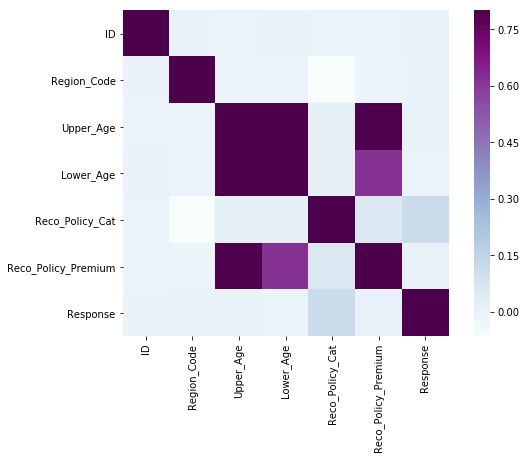

In [35]:
matrix=train.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu")

From the above heatmap we see that most correlated values are(Upper_Age-Lower_Age) and (Upper_Age-Reco_Policy_Premium). Lower_age is also correlated with Reco_Policy Premium.

#### Training the Dataset

In [36]:
#Dropping Id column from both train and test dataset as it's not needed
train=train.drop('ID',axis=1)
test=test.drop('ID',axis=1)

In [37]:
#Dropping the target variable from train dataset and saving it in another datset
X=train.drop('Response',1)
y=train.Response

In [38]:
#Creating Dummies
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [39]:
#Splitting the train dataset in 60% and 40% ratio
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.4)

#### Modeling

##### 1.Logistic Regression

In [40]:
#Importing Logistic Regression and applying it on splitted dataset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model_log=LogisticRegression()
model_log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
#Predicting the Response for validation set 
pred_cv1=model_log.predict(x_cv)

In [42]:
#Calculating Accuracy Score
accuracy_score(y_cv,pred_cv1)

0.7603793052621235

In [43]:
#Calculating Roc_auc_score
from sklearn.metrics import roc_auc_score
auc_score_log=roc_auc_score(y_cv,pred_cv1)
print(auc_score_log)

0.5


In [46]:
#Prediction for test dataset
pred_test1=model_log.predict(test)

In [45]:
#Importing submission file
submission=pd.read_csv("sample_submission_QrCyCoT.csv")

In [48]:
#Filling the submission dataset column with ID of test dataset and the prediction that we made in pred_test1
submission['Response']=pred_test1
submission['ID']=test_original['ID']

In [49]:
#converting submission to csv format 
pd.DataFrame(submission,columns=['ID','Response']).to_csv('logistic.csv')

##### 2.Naive Bayes

In [50]:
#Importing GaussianNB and applying it on splitted dataset
from sklearn.naive_bayes import GaussianNB
model_nb=GaussianNB()
model_nb.fit(x_train,y_train)
#Predicting the Response for validation set
pred_cv2=model_nb.predict(x_cv)
#Calculating Accuracy Score
accuracy_score(y_cv,pred_cv2)

0.7595931803665308

In [51]:
#Calculating Roc_auc_score
auc_score_nb=roc_auc_score(y_cv,pred_cv2)
print(auc_score_nb)

0.5002554240360954


In [52]:
#Prediction for test dataset
pred_test2=model_nb.predict(test)

In [53]:
#Importing submission file
submission=pd.read_csv("sample_submission_QrCyCoT.csv")
#Filling the submission dataset column with ID of test dataset and the prediction that we made in pred_test2
submission['Response']=pred_test2
submission['ID']=test_original['ID']

In [54]:
#converting submission to csv format 
pd.DataFrame(submission,columns=['ID','Response']).to_csv('gaussian.csv')

##### 3.KNN

In [55]:
#Importing KNeighborsClassifier and applying it on splitted dataset
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier()
model_knn.fit(x_train,y_train)
#Predicting the Response for validation set
pred_cv3=model_knn.predict(x_cv)
#Calculating Accuracy Score
accuracy_score(y_cv,pred_cv3)

0.7135066083624035

In [56]:
#Calculating Roc_auc_score
auc_score_knn=roc_auc_score(y_cv,pred_cv3)
print(auc_score_knn)

0.5021084258173663


In [57]:
#Prediction for test dataset
pred_test3=model_knn.predict(test)

In [59]:
#Importing submission file
submission=pd.read_csv("sample_submission_QrCyCoT.csv")
#Filling the submission dataset column with ID of test dataset and the prediction that we made in pred_test3
submission['Response']=pred_test3
submission['ID']=test_original['ID']

In [60]:
#converting submission to csv format 
pd.DataFrame(submission,columns=['ID','Response']).to_csv('knn.csv')

##### 4.Decision Tree

In [66]:
#Importing Decision Tree Classifier and applying it on splitted dataset
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
model_dt.fit(x_train,y_train)
#Predicting the Response for validation set
pred_cv4=model_dt.predict(x_cv)
#Calculating Accuracy Score
accuracy_score(y_cv,pred_cv4)

0.6665847786567091

In [67]:
#Calculating Roc_auc_score
auc_score_dt=roc_auc_score(y_cv,pred_cv4)
print(auc_score_dt)

0.5510874636767505


In [68]:
#Prediction for test dataset
pred_test4=model_dt.predict(test)

In [69]:
#Importing submission file
submission=pd.read_csv("sample_submission_QrCyCoT.csv")
#Filling the submission dataset column with ID of test dataset and the prediction that we made in pred_test4
submission['Response']=pred_test4
submission['ID']=test_original['ID']

In [70]:
#converting submission to csv format 
pd.DataFrame(submission,columns=['ID','Response']).to_csv('decisionTree.csv')

##### 5.Random Forest Classifier

In [71]:
#Importing RandomForestClassifier and applying it on splitted dataset
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()
model_rf.fit(x_train,y_train)
#Predicting the Response for validation set
pred_cv5=model_rf.predict(x_cv)
#Calculating Accuracy Score
accuracy_score(y_cv,pred_cv5)

0.742445831081413

In [72]:
#Calculating Roc_auc_score
auc_score_rf=roc_auc_score(y_cv,pred_cv5)
print(auc_score_rf)

0.5148186350889944


In [73]:
#Prediction for test dataset
pred_test5=model_dt.predict(test)

In [74]:
#Importing submission file
submission=pd.read_csv("sample_submission_QrCyCoT.csv")
#Filling the submission dataset column with ID of test dataset and the prediction that we made in pred_test5
submission['Response']=pred_test5
submission['ID']=test_original['ID']

In [75]:
#converting submission to csv format 
pd.DataFrame(submission,columns=['ID','Response']).to_csv('random.csv')

##### 6.Support Vector Machine

In [61]:
#Importing SVC and applying it on splitted dataset
from sklearn.svm import SVC
model_svc=SVC()
model_svc.fit(x_train,y_train)
#Predicting the Response for validation set
pred_cv6=model_svc.predict(x_cv)
#Calculating Accuracy Score
accuracy_score(y_cv,pred_cv6)

0.7600845084262762

In [62]:
#Calculating Roc_auc_score
auc_score_svc=roc_auc_score(y_cv,pred_cv6)
print(auc_score_svc)

0.49980615146032564


In [63]:
#Prediction for test dataset
pred_test6=model_svc.predict(test)

In [64]:
#Importing submission file
submission=pd.read_csv("sample_submission_QrCyCoT.csv")
#Filling the submission dataset column with ID of test dataset and the prediction that we made in pred_test6
submission['Response']=pred_test6
submission['ID']=test_original['ID']

In [65]:
#converting submission to csv format 
pd.DataFrame(submission,columns=['ID','Response']).to_csv('svc.csv')